# Analysis of the CaII line

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
# %matplotlib inline
from astropy.io import fits as f
import sunpy
from scipy.io import readsav
import cocopy as cp
from ISPy.io import solarnet
import sunpy.map
import astropy.units as u
from scipy.io import readsav as rs
from PIL import Image, ImageEnhance
import use_nessi as un
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection


e:\solar flares\data\2017-09-06\use_nessi.py:309: SyntaxWarning: invalid escape sequence '\A'
  da.plot_fit(data, model=model_atlas, theta0=mini['x'], titel="Fitting atlas to nessi ",labelx=" $wavelength [\AA]$",
e:\solar flares\data\2017-09-06\use_nessi.py:980: SyntaxWarning: invalid escape sequence '\A'
  da.plot_fit(data, model=f_nessi_clv, theta0=mini['x'], titel="fitting Nessi to sst data ",labelx=" $wavelength [\AA]$",
e:\solar flares\data\2017-09-06\use_nessi.py:1732: SyntaxWarning: invalid escape sequence '\D'
  print(f'The maximal signal to noise ratio for the {criterion} criterion is if the interval is of width $\Delta x={Deltas[i]}\AA$.')
e:\solar flares\data\2017-09-06\use_nessi.py:1732: SyntaxWarning: invalid escape sequence '\A'
  print(f'The maximal signal to noise ratio for the {criterion} criterion is if the interval is of width $\Delta x={Deltas[i]}\AA$.')
e:\solar flares\data\2017-09-06\use_nessi.py:1992: SyntaxWarning: invalid escape sequence '\s'
  return "E:\solar

In [2]:
import sys
print('sys.path:', sys.path)

sys.path: ['e:\\solar flares\\data\\2017-09-06', 'c:\\Users\\Gebruiker\\Anaconda3\\python312.zip', 'c:\\Users\\Gebruiker\\Anaconda3\\DLLs', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib', 'c:\\Users\\Gebruiker\\Anaconda3', '', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages\\win32', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages\\Pythonwin', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages\\setuptools\\_vendor']


# functies uittesten met CaII

(1038, 1079) (1038, 1079)
Boundary
Blue=Outside, yellow=Inside


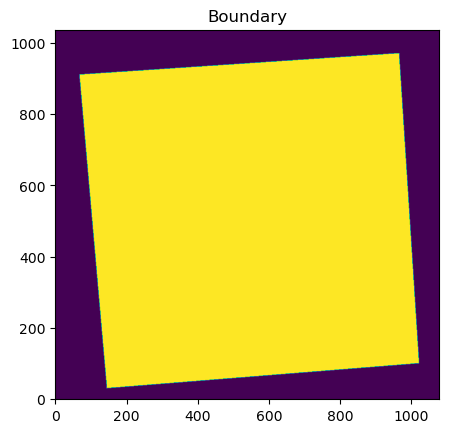

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')
[30, 60] [1.70895653e-08 1.99073806e-08]
[631, 646] [2.33172465e-08 1.96068617e-08]
[194, 268] [1.7007815e-08 1.9887316e-08]
[298, 323] [1.18704154e-08 1.36761467e-08]
[472, 204] [1.53954859e-08 1.85800599e-08]
[30, 60] [1.77462844e-08 2.11367137e-08]
[631, 646] [1.63276036e-08 1.83728823e-08]
[194, 268] [1.87398272e-08 2.19730493e-08]
[298, 323] [1.37608445e-08 1.88029691e-08]
[472, 204] [1.60014118e-08 1.89450619e-08]
[30, 60] [1.73635257e-08 2.01355732e-08]
[631, 646] [1.65598206e-08 1.81437240e-08]
[194, 268] [1.78025171e-08 2.02848739e-08]
[298, 323] [8.66208392e-09 9.81781716e-09]
[472, 204] [1.43120893e-08 1.66008937e-08]
[30, 60] [1.71880643e-08 2.01337755e-08]
[631, 646] [1.63602767e-08 2.73891362e-08]
[194, 268] [1.83631043e-08 2.08478821e-08]
[298, 323] [8.24692183e-09 9.06941650e-09]
[472, 204] [1.45487

In [3]:
reload(un)
# %matplotlib widget
# print(np.shape(CaII.datacube))
# vertices = (1038,1079),[(20, 104),(77, 1020), (960,964), (900,48)] # boundary of the first frame
vertices2 = [(30, 145),(100, 1020), (970,964), (910,68)] # more restricted boundary to fit all frames.
CaII = un.SST_data(#'nb_8542_2017-09-06T09_04_20_09_04_20=0-200_mixed_stokes_corrected_im.fits',
                   'nb_8542_2017-09-06T11_55_47_scans=3-215_stokes_corrected_im_new.fits',
                   'spectfile8542_93.idlsave','times8542_93_2017_09_06_11_55_47.idlsave',
                   name_of_line='CaII17', boundary_methode='By_user',boundary_arguments=vertices2)

for frame in range(0,213,70):
    pixels=[[30,60],[631,646],[194,268],[298,323],[472,204]]
    for i in pixels:
        print(i, CaII.datacube[frame,0,::10,i[1],i[0]])

# # CaII.datacube
# plt.imshow(CaII.boundary[:,:])
# print(np.shape(CaII.boundary), np.shape(CaII.datacube))

s = np.sum(CaII.boundary)
areafactor = s/847550 * 60**2 / (np.pi*950**2)

print(s, 'persentage of frame kept:', s/847550, 'areafactor:', areafactor) # to account for a bit of extra non excluded pixels


# CaII.datacube[70,0,:,600,600]

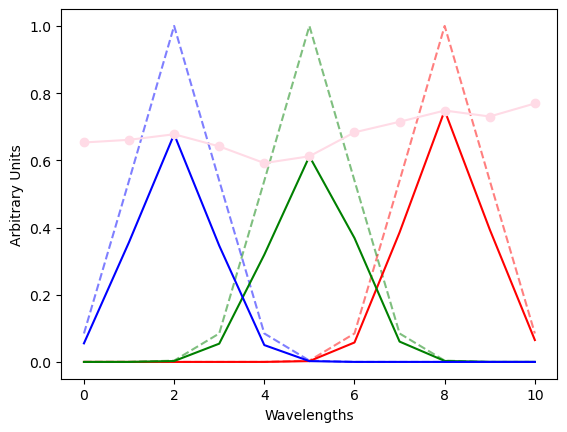

In [4]:
# %matplotlib inline
CaII.update_filters([[8,0.9], [5,0.9], [2,0.9]])
CaII.plot_filt(880,900)

In [5]:
# CaII.ccp_frame(70,Show=False)
# plt.imshow(CaII.current_ccp[::-1,:])

# plt.imshow(CaII.boundary[::-1,:], alpha=0.2)
# plt.show()
# print(np.shape(CaII.current_ccp[::-1,:]),np.shape(CaII.boundary[::-1,:]))

In [6]:
# # Many COCOPLOTS
# r = CaII._number_of_frames
# for i in range(0,r,40):
#     tstr = CaII.time_of_frame(i)
#     print("COCOPLOT at ", tstr, "(frame number", i,")")
#     CaII.ccp_frame(i,Show=False)
#     plt.imshow(CaII.current_ccp[::-1,:])

#     plt.imshow(CaII.boundary[::-1,:], alpha=0.2)
#     plt.show()


In [7]:
# CaII.ccp_frame(70)
# pixels=[[30,60],[631,646],[194,268],[298,323],[472,204]]
# # CaII.current_ccp[0:30:5,0:60:5,:]

In [8]:
# print(pixels)
# x=[]
# frame = 70
# for frame in range(0,213,40):
#     print('frame:',frame)
#     for i in pixels:
#         x.append(CaII.datacube[frame,0,10,i[1],i[0]] - CaII.datacube[frame,0,0,i[1],i[0]])
#         print(i, x[-1])
# CaII.interesting_pixels(frame, pixels, rand=False, numb=30)
# mx = np.mean(x)
# correction = - mx * (CaII._wavel - CaII._wavel[0])
# print(CaII._wavel, correction)

# frame = 70

# print(frame)
# colors = CaII.ccp_frame(frame,Show=False)

# fig, ax = plt.subplots(1)
# ax.set_title("spectral lines of some pixels: "+ CaII.time_of_frame(frame) )
# for p in range(len(pixels)):
#     ax.plot(CaII._wavel, CaII.datacube[frame,0, :, pixels[p][1], pixels[p][0]] + correction,
#             label="pixel x="+str(pixels[p][0])+" y="+str(pixels[p][1]))
# ax.set_xlabel(r"wavelength [$\rm\AA$]")
# ax.set_ylabel("intensity [units???]")
# ax.legend(fontsize=6)
# plt.show()

In [9]:
# print('1',end='\rt')
# print('10 ',end='')
# print('\r\r\r11 ',end='')
# j=12
# s = ''
# for i in range(len(str(j))+1):
#     s += '\r'
# print(s, end=str(j))

In [10]:
CaII.calculate__FOV_spect_over_time()

# try :
#     FOV_spectrum = np.load('FOV_spectrum_CaII.npy')
# except:
#     # time_av_spectrum = np.array([Ha.frame_integrated_spect(frame)/Ha.scalar for frame in range(213)])
#     FOV_spectrum=[]
#     for frame in range(np.shape(sst_data.datacube)[0]):
#         s=''
#         for i in range(len(str(frame))+1):
#             s += '\r'
#         print(s, end=str(frame))
#         FOV_spectrum.append(sst_data.frame_integrated_spect(frame)/sst_data.scalar)

#     FOV_spectrum = np.array(FOV_spectrum)
#     np.save('FOV_spectrum_CaII.npy', FOV_spectrum)
# np.shape(FOV_spectrum), sst_data.scalar

Make sure the following correction is added only once! However adding it a second time should not differ it.

In [11]:
# def add_correction(sst_data, FOV_spectrum, theoretical_difference):
#     if hasattr(sst_data, 'correction'):
#         print('the correction has already been done ')
#         return FOV_spectrum, sst_data.correction

#     mean_difference_observation = np.mean(FOV_spectrum[:,-1]-FOV_spectrum[:,0])
#     print(mean_difference_observation, theoretical_difference)

#     correction = -(mean_difference_observation - theoretical_difference) * (sst_data._wavel - sst_data._wavel[0])

#     FOV_spectrum = FOV_spectrum + correction
#     sst_data.correction = correction
#     return FOV_spectrum, correction

FOV_spectrum, correction = CaII.add_correction(theoretical_difference=0.03497400310369425)



In [12]:
print(correction)

[-0.         -0.03381729 -0.06763458 -0.08454323 -0.10145187 -0.11836052
 -0.13526916 -0.15217781 -0.16908645 -0.20290375 -0.23672104]


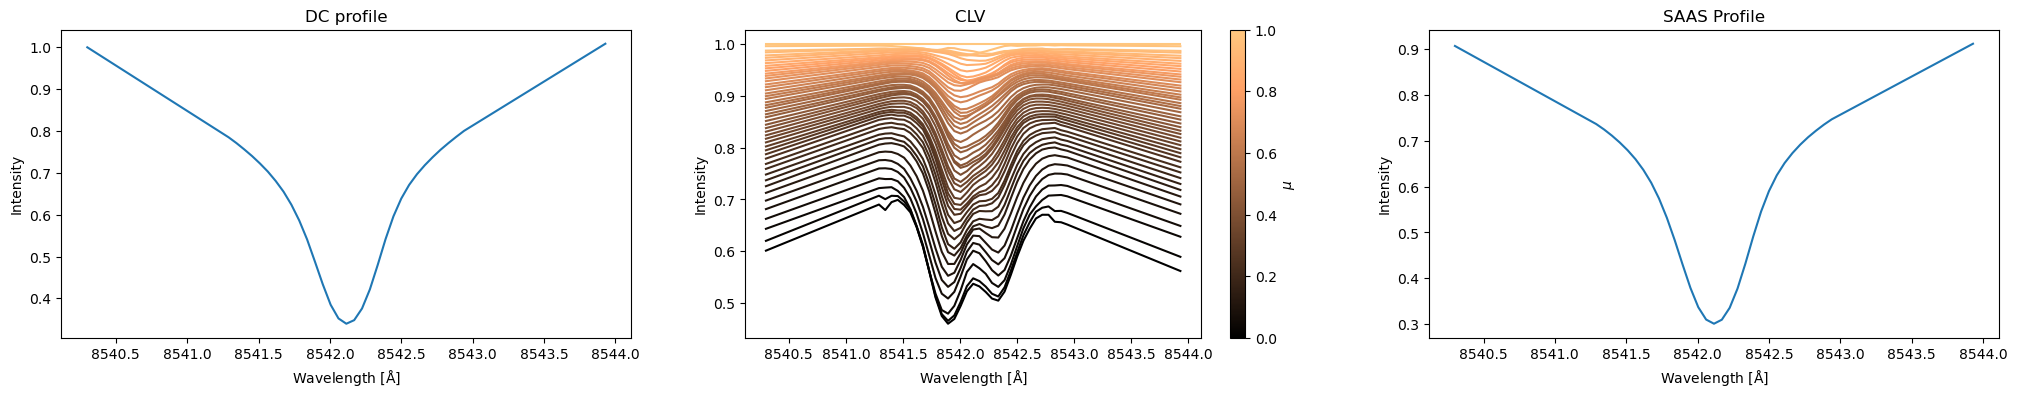

In [13]:
import use_nessi3 as un3
theor_CaII = un3.linestudier('8542_clv.fits', nr=101)


## Finding $\mu$

e:\solar flares\data\2017-09-06\use_nessi.py:309: SyntaxWarning: invalid escape sequence '\A'
  da.plot_fit(data, model=model_atlas, theta0=mini['x'], titel="Fitting atlas to nessi ",labelx=" $wavelength [\AA]$",
e:\solar flares\data\2017-09-06\use_nessi.py:980: SyntaxWarning: invalid escape sequence '\A'
  da.plot_fit(data, model=f_nessi_clv, theta0=mini['x'], titel="fitting Nessi to sst data ",labelx=" $wavelength [\AA]$",
e:\solar flares\data\2017-09-06\use_nessi.py:1732: SyntaxWarning: invalid escape sequence '\D'
  print(f'The maximal signal to noise ratio for the {criterion} criterion is if the interval is of width $\Delta x={Deltas[i]}\AA$.')
e:\solar flares\data\2017-09-06\use_nessi.py:1732: SyntaxWarning: invalid escape sequence '\A'
  print(f'The maximal signal to noise ratio for the {criterion} criterion is if the interval is of width $\Delta x={Deltas[i]}\AA$.')
e:\solar flares\data\2017-09-06\use_nessi.py:1992: SyntaxWarning: invalid escape sequence '\s'
  return "E:\solar

(213, 4, 11, 1038, 1079)
The frame is centered at (524.6951755526969, -235.1869288002494)
COCOPLOT at  t=11:55:57 UT (frame number 0 )


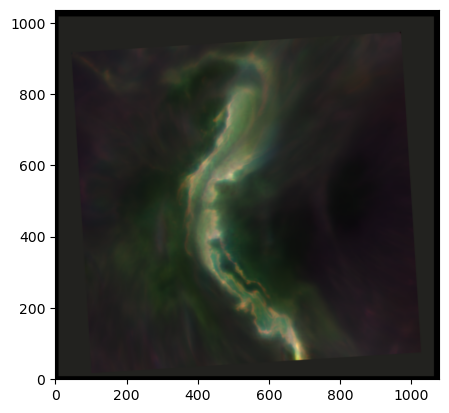

[500.87502555269697, 548.5153255526969, -267.62932880024937, -202.7445288002494]
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.7997209667453697 for timeframe 0
succesfully saved.
The frame is centered at (529.4665422492486, -232.5215139851784)
COCOPLOT at  t=12:45:51 UT (frame number 200 )


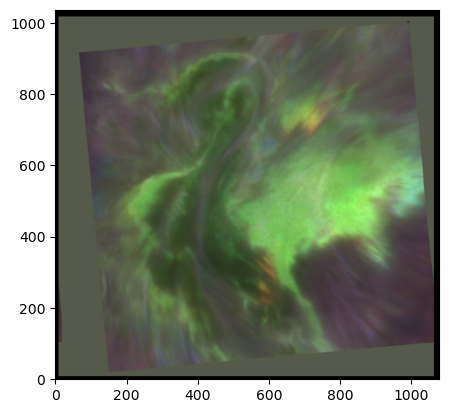

[505.64639224924866, 553.2866922492486, -264.96391398517835, -200.0791139851784]
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.7971482301738789 for timeframe 200
We take average mu to be  0.7984345984596244
Mu also set to the theoretic nessi line.


(0.7984345984596244, array([10], dtype=int64))

In [15]:
reload(un)
print(np.shape(CaII.datacube))
mu = CaII.set_mu(theor_line=theor_CaII, number_of_last_frame=200, 
                    alternative_filename='fits/nb_3950_2017-09-06T11_55_49_11_55_49=6-399_mixed_corrected_im.fits')
x = np.abs(theor_CaII.sst_mu-mu)
index_mu = np.where(x == np.min(x))[0]
mu, index_mu

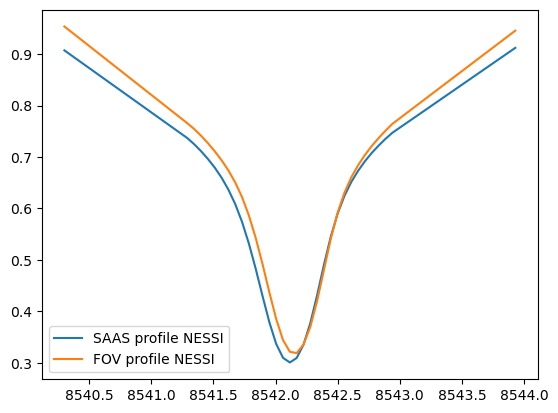

In [16]:
sst_data = CaII
theor_CaII.set_fov( sst_data.xx, sst_data.yy, sst_data.boundary, sr=959.63)

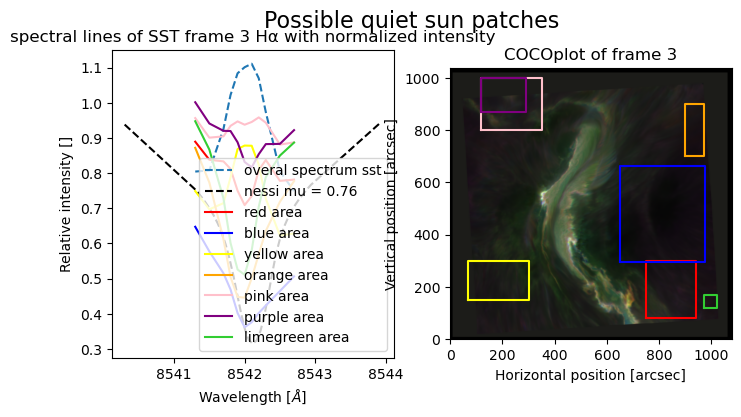

In [17]:
# %matplotlib widget
# %matplotlib inline
frame = 3

X = [[(750,940), (80,300)], [(650,975), (294,662)],[(70,300), (150,300)], [(900, 970), (700, 900)], [(120,350), (800,1000)] 
     , [(120,290), (870,1000)], [(970,1020),(120,170)]]
# X = [[(750,940), (230,300)], [(650,975), (294,662)],[(270,300), (250,300)], [(800, 900), (700, 900)], [(220,350), (700,800)] , [(220,290), (700,800)],]
#X=[[(600,602),(600,602)]]
CaII.possible_quiet_sun_patches(frame, theor_line = theor_CaII, X=X)


### The quiet sun patch

fill in here which color the wanted quiet sun patch had 

In [18]:
color_wanted_patch = 'limegreen'

the edges of the patch are denoted by the xlim: (970, 1020) and ylim: (120, 170)


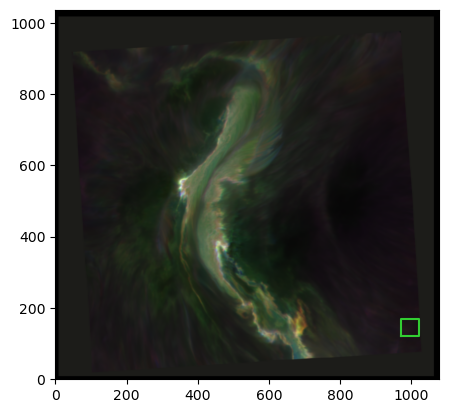

The quiet sun is pick at x (549.5965576945176, -255.9225893950144) with average              mu 0.775159430158545
[[0.57158887 0.57163492 0.57168097 ... 0.57375333 0.57379938 0.57384543]
 [0.57158887 0.57163492 0.57168097 ... 0.57375333 0.57379938 0.57384543]
 [0.57158887 0.57163492 0.57168097 ... 0.57375333 0.57379938 0.57384543]
 ...
 [0.57158887 0.57163492 0.57168097 ... 0.57375333 0.57379938 0.57384543]
 [0.57158887 0.57163492 0.57168097 ... 0.57375333 0.57379938 0.57384543]
 [0.57158887 0.57163492 0.57168097 ... 0.57375333 0.57379938 0.57384543]] [[-0.26828626 -0.26828626 -0.26828626 ... -0.26828626 -0.26828626
  -0.26828626]
 [-0.26822106 -0.26822106 -0.26822106 ... -0.26822106 -0.26822106
  -0.26822106]
 [-0.26815586 -0.26815586 -0.26815586 ... -0.26815586 -0.26815586
  -0.26815586]
 ...
 [-0.26522177 -0.26522177 -0.26522177 ... -0.26522177 -0.26522177
  -0.26522177]
 [-0.26515657 -0.26515657 -0.26515657 ... -0.26515657 -0.26515657
  -0.26515657]
 [-0.26509137 -0.26509137 -0.265

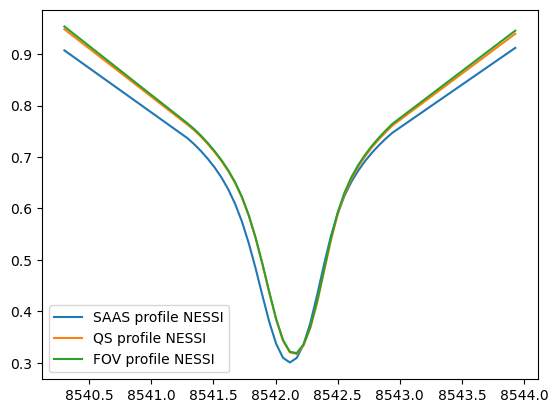

{'frame': 3, 'xlim': (970, 1020), 'ylim': (120, 170), 'color': 'limegreen'}

In [19]:
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']
ind = colors.index(color_wanted_patch)

xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)

CaII.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)

theor_CaII.set_quiet_sun(xlim=xlim, ylim=ylim, show=True)
CaII.quiet_sun

[8541.3 8541.5 8541.7 8541.8 8541.9 8542.  8542.1 8542.2 8542.3 8542.5
 8542.7] [0.94744466 0.86684066 0.72826305 0.60150788 0.52595682 0.51108001
 0.58044925 0.70487646 0.78875765 0.84988714 0.88689579] [0.76089572 0.71207076 0.63612722 0.57315796 0.48538806 0.38855461
 0.32656182 0.32630079 0.3857948  0.58849142 0.6937385 ]
the given inital guess is [-0.1249  0.8865]
[-0.1249  0.8865]
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 126.57699666480721
        x: [-1.765e-01  1.387e+00]
      nit: 9
      jac: [ 2.861e-06  9.537e-07]
 hess_inv: [[ 4.739e-05 -1.022e-05]
            [-1.022e-05  1.476e-04]]
     nfev: 48
     njev: 16


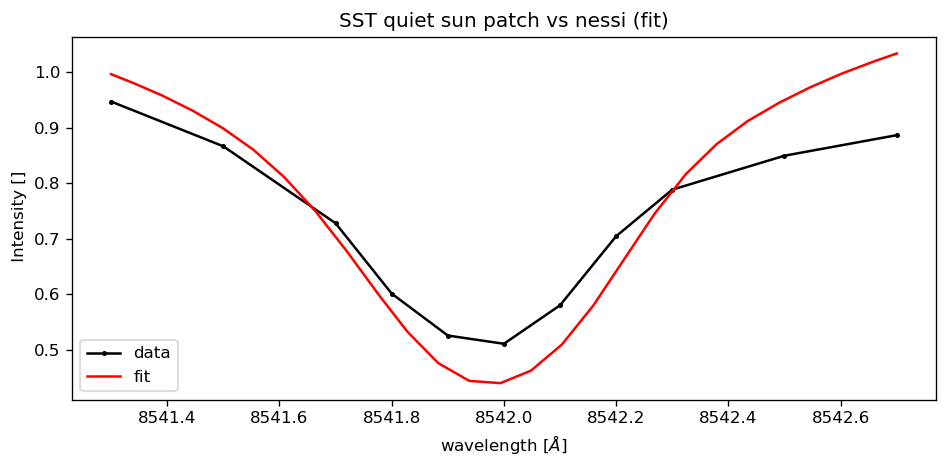

de p-waarde is  0.12006289096041318 
Chi^2 reduced= 14.064110740534135 
aantal vrijheidgraden= 9 
chi^2= 126.57699666480721
we behouden de fit tot op een betrouwbaarheidsniveau van  0.12006289096041318 
Oftewel verwerp als p-waarde <lpha-niveau 


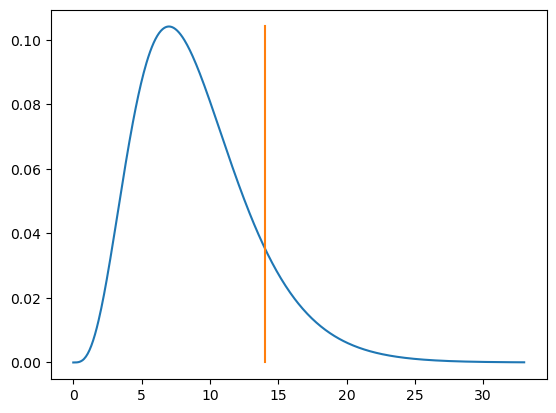

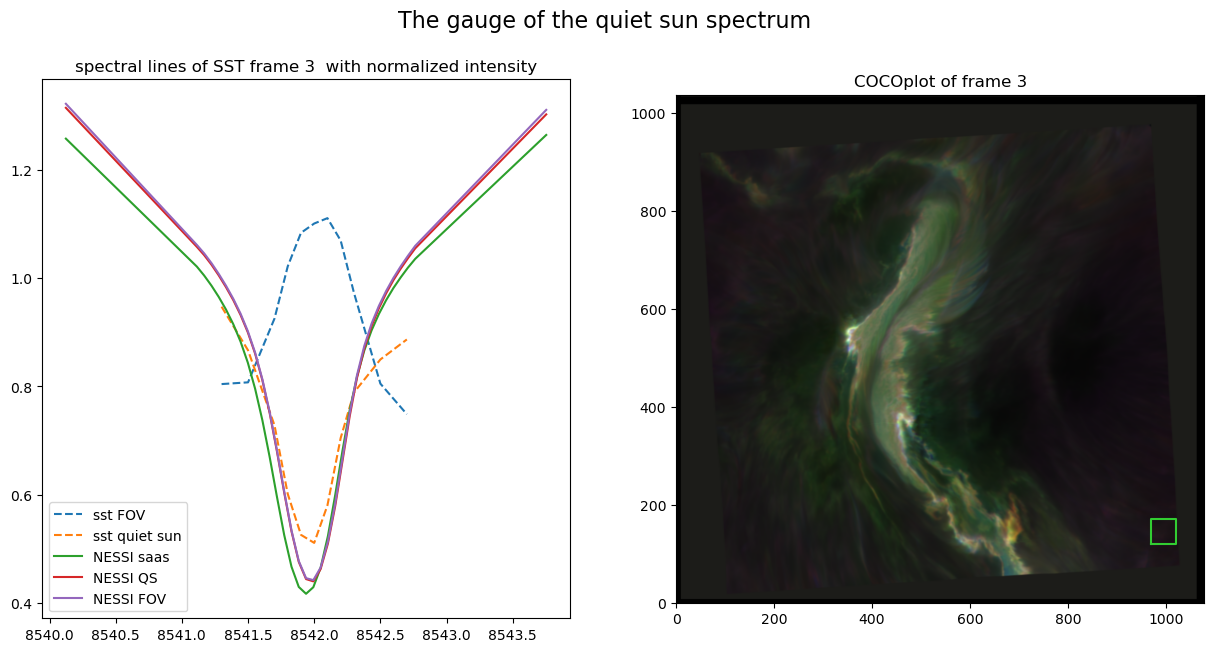

In [20]:
reload(un3)
un3.fit_qs_to_NESSI(theor_CaII, CaII, initial_guess=np.array([-1.249e-01 , 8.865e-01]))

In [21]:
# mini, f_nessi_theta, f_nessi_clv_theta = CaII.fit_nessi_to_quiet_sun( theor_line = theor_CaII, mu_data=0.7984345984596244,
#                                                                      initial_values=np.array([-2.349e-01 , 5.072e-01,  8.865e-01]))

[-0.17651715369788873, 0, 1.3867126760452129]
Intensity limit calculation for first time.
Intensity limit is saved.
Frame: 0, b'11:55:57.689173', total number of frames: 213 


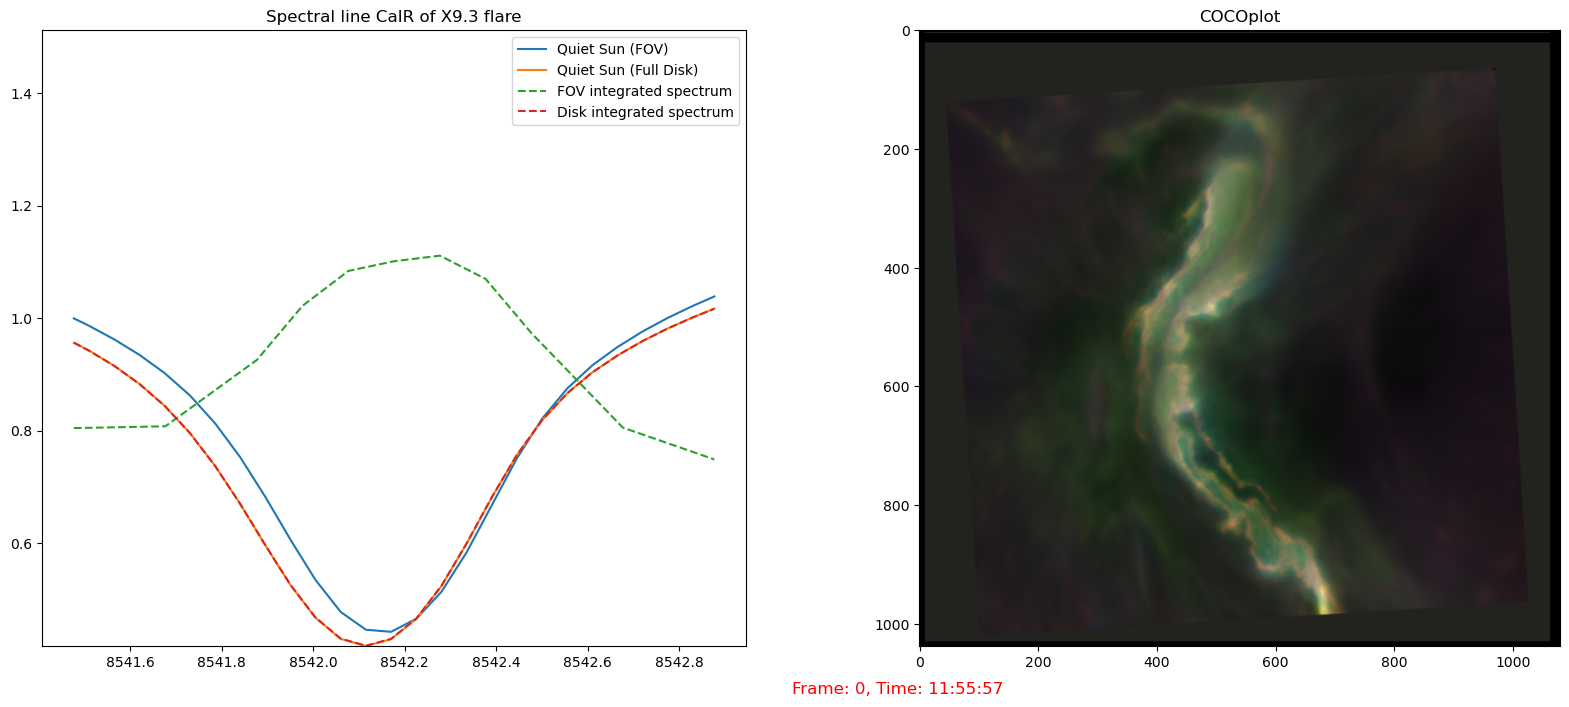

In [22]:
reload(un)
un.Movie_making(theor_CaII, CaII, "X9.3", "CaIR")

In [ ]:
exit()

In [23]:
# # %matplotlib widget
# theor_line = theor_CaII
# sst_data = CaII
# theta = sst_data.theta_nessi_to_quiet_sun
# theta[1] = theta[2]
# name_of_flare = "X9.3"
# name_of_line = "CaIR"

# f_nessi_qs = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[1] * theor_line.spectr_qs 
#                                 , kind='linear', fill_value="extrapolate")
# f_nessi_fov = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[1] * theor_line.spectr_fov 
#                                 , kind='linear', fill_value="extrapolate")
# f_nessi_saas = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[1] * theor_line.saas_profile 
#                                 , kind='linear', fill_value="extrapolate")

# # f_nessi_clv = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc*theor_line.sst_clv[12] + theta[1]
# #                                   , kind='linear', fill_value="extrapolate")
# # f_nessi = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc + theta[1]
# #                                   , kind='linear', fill_value="extrapolate")
# # f_sst = interp1d(sst_data._wavel, sst_data.av_spect/sst_data.scalar, kind='linear', fill_value="extrapolate")

# # print(sst_data._wavel, theor_line.sst_wav+ sst_data.theta_nessi_to_quiet_sun[0])
# wav = un.merge_wavelengths(sst_data._wavel+ theta[0], theor_line.sst_wav)


# area_weight = 60**2 / (np.pi*950**2)

# def derive_intensity_lim(sst_data, mins = [], maxs = []):
#     n = sst_data._number_of_frames   
    
#     for frame in range(0, n, n//10):
#         sst_data.frame_integrated_spect(frame)
#         mins.append(np.min(sst_data.av_spect))
#         maxs.append(np.max(sst_data.av_spect))
        
#     return np.min(np.array(mins)), np.max(np.array(maxs))
    

# def frame_visualization(sst_data, frame, theta):
#     fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20, 8)) #, gridspec_kw={'height_ratios': [5, 1], "width_ratios":[1,1.2]})

#     sst_data.ccp_frame(frame,Show=False)
#     a=sst_data.current_ccp

#     ax[0].set_title(f"spectral line {name_of_line} of {name_of_flare} flare")
#     sst_data.frame_integrated_spect(frame)
#     line_sst, = ax[0].plot(sst_data._wavel, sst_data.av_spect, '--', label='sst data')
#     ax[0].plot(wav , f_nessi_fov(theta)(wav), label=f'nessi mu = {round(mu, 2)}')
#     ax[0].plot(wav, f_nessi_saas(theta)(wav), label='nessi full disk')
#     ax[0].legend()
#     limit = derive_intensity_lim(sst_data, 
#                                  mins=[np.min(f_nessi_saas(theta)(wav)), np.min(f_nessi_fov(theta)(wav))],
#                                  maxs=[np.max(f_nessi_saas(theta)(wav)), np.max(f_nessi_fov(theta)(wav))])
#     ax[0].set_ylim(limit)

#     im = ax[1].imshow(Image.fromarray(sst_data.current_ccp[::-1,:]))
#     ax[1].set_title(f"COCOplot")
#     text = ax[1].text(
#         -300, -20, f"frame: {str(frame)}, {str(sst_data._time[frame])[2:10]}", fontsize=12, color='red'
#     )
#     print(f"frame: {str(frame)}, {sst_data._time[frame]}")

#     plt.show()

#     return fig, line_sst,  im, text

# for frame in [60, 0]:
#     frame_visualization(CaII, frame, sst_data.theta_nessi_to_quiet_sun)

In [24]:
# # %matplotlib inline

# fps = 6
# nSeconds = 5
# frame = 0
# sst_data = CaII

# fig, line_sst, im, text, = frame_visualization(sst_data, frame, sst_data.theta_nessi_to_quiet_sun)

# # animation function.  This is called sequentially
# def animate(i):
#     step = 1 # step of number of frames. How to step through the frames, at which rate.
#     frame = np.min([step * i, 212])

#     x = sst_data._wavel
#     y = sst_data.frame_integrated_spect(frame)
#     f_sst2 = interp1d(sst_data._wavel, y, kind='linear', fill_value="extrapolate")
#     line_sst.set_data(x, y)

#     print(frame, end=" ")


#     text.set_text(f"frame: {str(frame)}, {str(sst_data._time[frame])[2:10]}")
#     # text = ax[1].text(
#     #     -300, -20, f"frame: {str(frame)}, {str(sst_data._time[frame])[2:10]}", fontsize=12, color='red'
#     # )    
#     sst_data.ccp_frame(frame,Show=False)
#     a = sst_data.current_ccp
#     im.set_array(Image.fromarray(a[::-1,:]))
#     return line_sst, [im], text



In [25]:

# # call the animator.  blit=True means only re-draw the parts that have changed.
# anim = animation.FuncAnimation(fig, animate,
#                                frames=212 , interval=500) #sst_data._number_of_frames



In [26]:
# # save the animation as an mp4.  This requires ffmpeg or mencoder to be
# # installed.  The extra_args ensure that the x264 codec is used, so that
# # the video can be embedded in html5.  You may need to adjust this for
# # your system: for more information, see
# # http://matplotlib.sourceforge.net/api/animation_api.html
# anim.save(f'E:/solar flares/data/animations/{name_of_flare.replace(".", "")}_{name_of_line}_animation.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])
# theta[1] = 0

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

The peak occurs at frame [28] at time t=[b'12:02:56 UT.
The SST data runs from t=11:55:57 UT to t=12:52:05 UT.


ValueError: theta[1]=1.3867126760452129 should be zero!

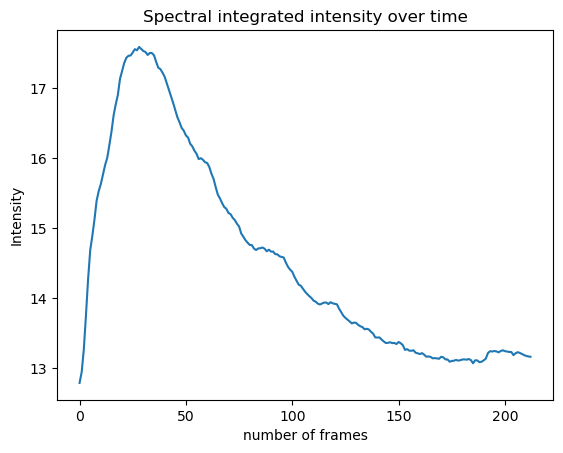

In [28]:
un.save_for_further_analysis(CaII, theor_CaII)
import numpy as np
import use_nessi as un

filename = un.get_file_path_line_data("TIME_CaII17")
TIME = np.load(filename)
print(np.shape(TIME))
if np.shape(TIME)[0] > 213:
    print("We change it")
    TIME = TIME[3:216]
    np.save(filename, TIME)